In [1]:
import pandas as pd
import numpy as np

### from **gpflow**

In [ ]:
co2_data = pd.read_csv(
    "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv", comment="#"
)
Xco2 = co2_data["decimal date"].values[:, None]
Yco2 = co2_data["average"].values[:, None]

In [ ]:
co2_data.head()

In [ ]:
Xco2.shape

In [ ]:
Yco2.shape

In [ ]:
Xco2[:10]

### from **scikit learn**

In [2]:
from sklearn.datasets import fetch_openml

co2 = fetch_openml(data_id=41187, as_frame=True, parser="pandas")
co2.frame.head()

,year,month,day,weight,flag,station,co2
0,1958,3,29,4,0,MLO,316.1
1,1958,4,5,6,0,MLO,317.3
2,1958,4,12,4,0,MLO,317.6
3,1958,4,19,6,0,MLO,317.5
4,1958,4,26,2,0,MLO,316.4


In [3]:
co2_data = co2.frame
co2_data["date"] = pd.to_datetime(co2_data[["year", "month", "day"]])
co2_data = co2_data[["date", "co2"]].set_index("date")
co2_data.head()

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [5]:
co2_data.shape

(2225, 1)

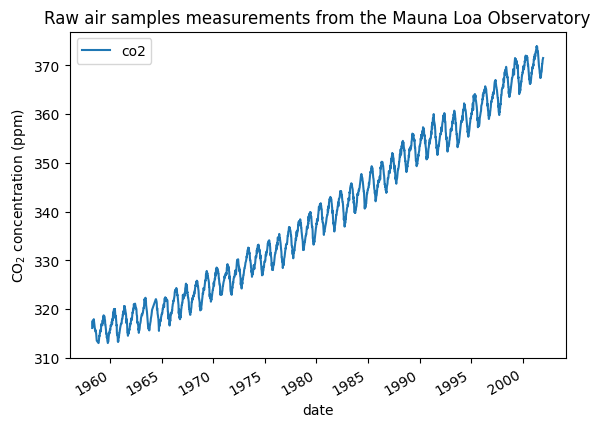

In [6]:
import matplotlib.pyplot as plt

co2_data.plot()
plt.ylabel("CO$_2$ concentration (ppm)")
_ = plt.title("Raw air samples measurements from the Mauna Loa Observatory")

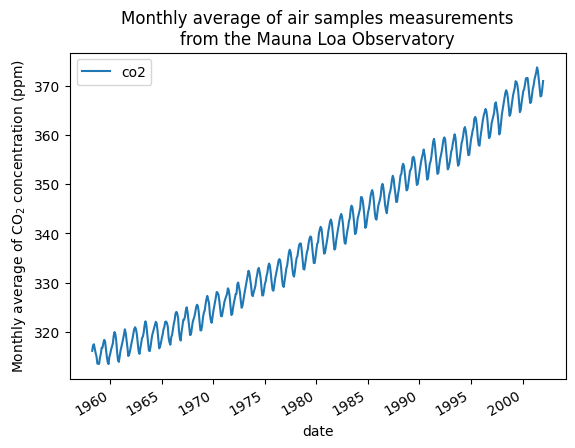

In [7]:
co2_data = co2_data.resample("M").mean().dropna(axis="index", how="any")
co2_data.plot()
plt.ylabel("Monthly average of CO$_2$ concentration (ppm)")
_ = plt.title(
    "Monthly average of air samples measurements\nfrom the Mauna Loa Observatory"
)

In [8]:
co2_data.shape

(521, 1)

In [9]:
co2_data.head()

,co2
date,
1958-03-31,316.100000
1958-04-30,317.200000
1958-05-31,317.433333
1958-07-31,315.625000
1958-08-31,314.950000


In [12]:
X = (co2_data.index.year + co2_data.index.month / 12).to_numpy().reshape(-1, 1)
y = co2_data["co2"].to_numpy()

In [16]:
X.shape

(521, 1)